In [41]:
# Import everything we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Step 1: Load data and preprocessing data
data = pd.read_csv("./Resources/2024_energy_efficiency_data.csv")

# Shuffle data
data = data.sample(frac=1).reset_index(drop=True)

# One hot
data = pd.get_dummies(
    data,
    columns=["Orientation", "Glazing Area Distribution"],
    prefix=["Orientation", "GlazingAreaDist"],
    dtype=int,
)

# Split to X and Y
X = data.drop(columns=["Heating Load", "Cooling Load"])
Y = data[["Heating Load", "Cooling Load"]]

# Scale data to range of [0, 1]
to_scale = [
    "# Relative Compactness",
    "Surface Area",
    "Wall Area",
    "Roof Area",
    "Overall Height",
    "Glazing Area",
]

for category in to_scale:
    X[category] = (X[category] - X[category].min()) / (X[category].max() - X[category].min())
# Define the split index for 75% training and 25% testing
split_index = int(0.75 * len(X))
# Split the data
X_train = X[:split_index]
X_test = X[split_index:]
Y_train = Y[:split_index]
Y_test = Y[split_index:]

Shape of dataset: (768, 10)
Data types and first few rows:
 # Relative Compactness       float64
Surface Area                 float64
Wall Area                    float64
Roof Area                    float64
Overall Height               float64
Orientation                  float64
Glazing Area                 float64
Glazing Area Distribution    float64
Heating Load                 float64
Cooling Load                 float64
dtype: object    # Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                    0.98         514.5      294.0     110.25             7.0   
1                    0.98         514.5      294.0     110.25             7.0   
2                    0.98         514.5      294.0     110.25             7.0   
3                    0.90         563.5      318.5     122.50             7.0   
4                    0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing Area  Glazing Area Distribution  Heating Load

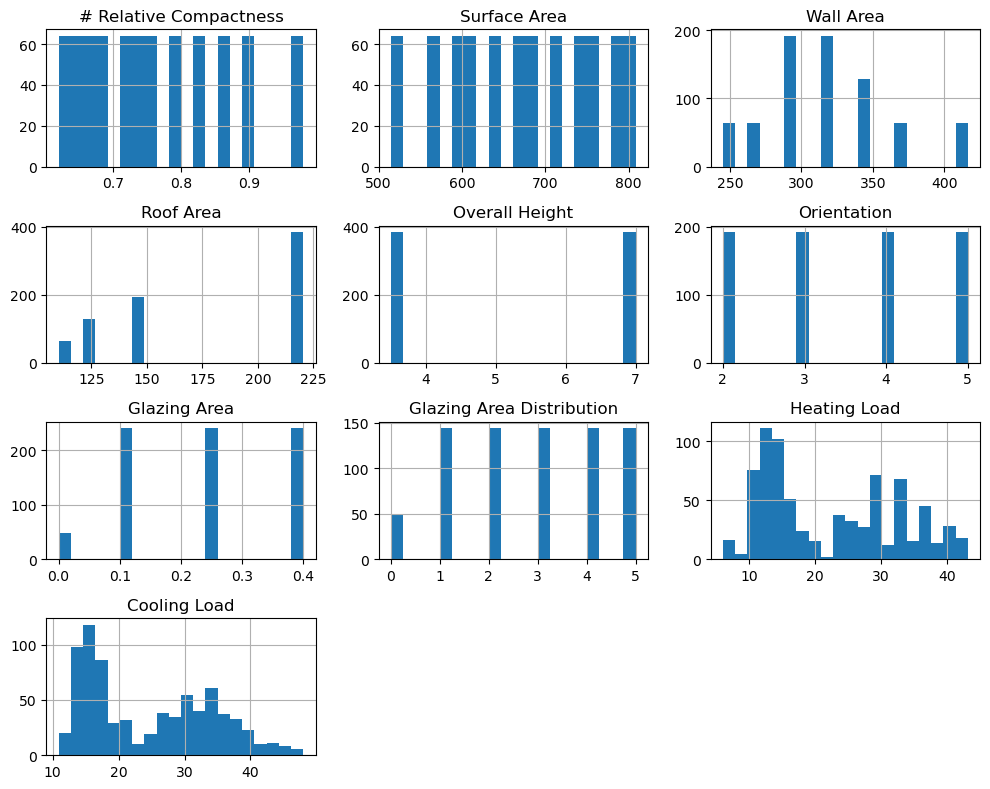

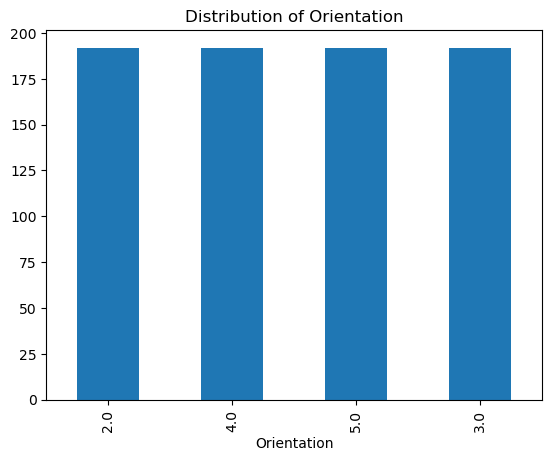

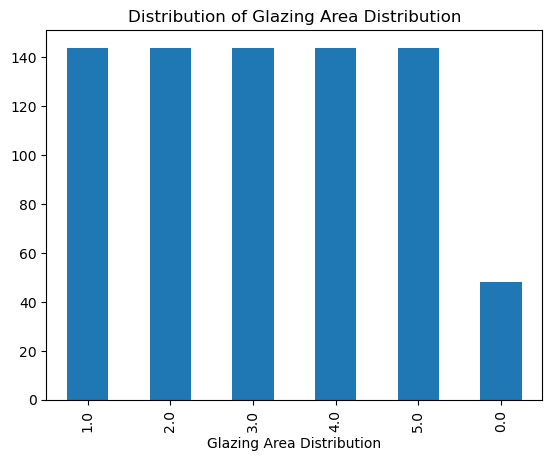

Correlation matrix:
                            # Relative Compactness  Surface Area     Wall Area  \
# Relative Compactness               1.000000e+00 -9.919015e-01 -2.037817e-01   
Surface Area                        -9.919015e-01  1.000000e+00  1.955016e-01   
Wall Area                           -2.037817e-01  1.955016e-01  1.000000e+00   
Roof Area                           -8.688234e-01  8.807195e-01 -2.923165e-01   
Overall Height                       8.277473e-01 -8.581477e-01  2.809757e-01   
Orientation                          4.357512e-17  2.793819e-16  3.957426e-17   
Glazing Area                         3.569803e-15  2.896830e-15  1.900780e-16   
Glazing Area Distribution            1.090094e-15  9.211165e-16  2.385022e-16   
Heating Load                         6.222722e-01 -6.581202e-01  4.556712e-01   
Cooling Load                         6.343391e-01 -6.729989e-01  4.271170e-01   

                              Roof Area  Overall Height   Orientation  \
# Relative Com

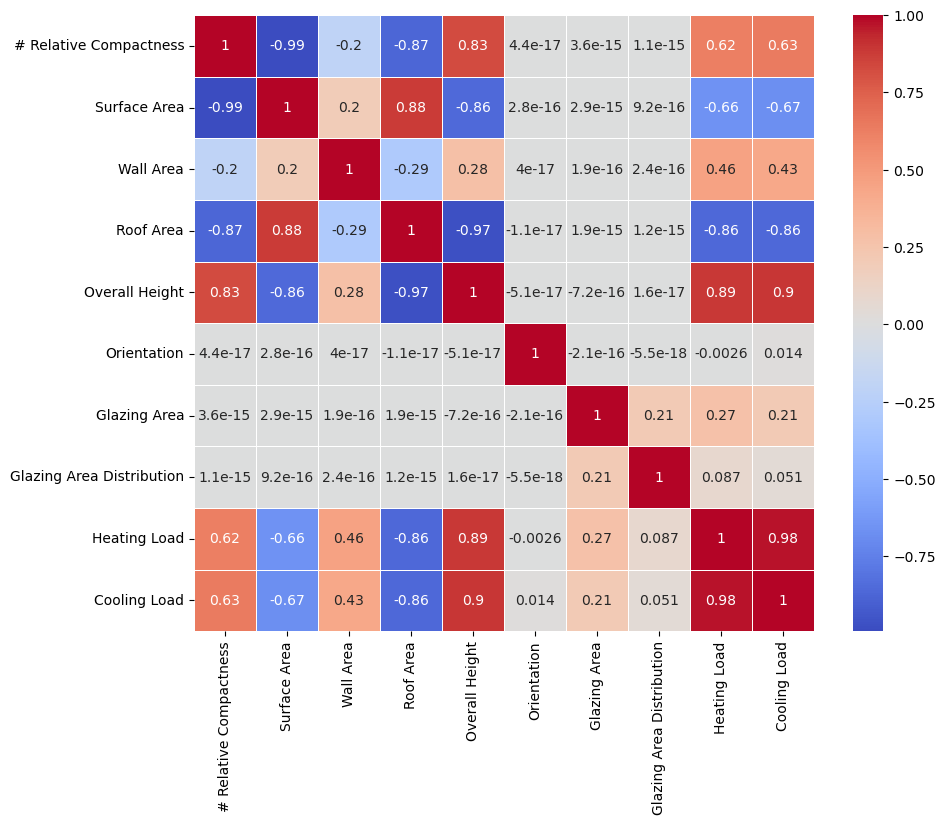

Heating Load Distribution:
 count    768.000000
mean      22.307201
std       10.090196
min        6.010000
25%       12.992500
50%       18.950000
75%       31.667500
max       43.100000
Name: Heating Load, dtype: float64


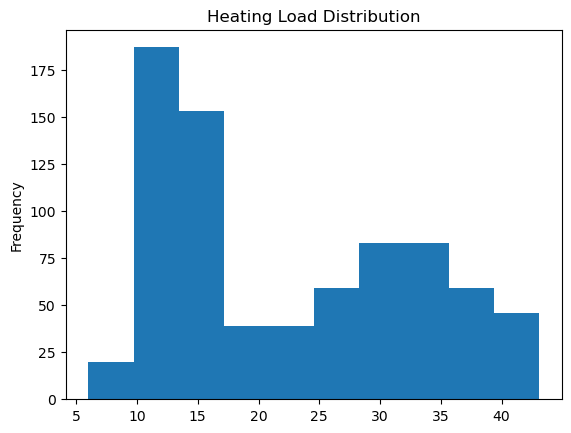

Cooling Load Distribution:
 count    768.000000
mean      24.587760
std        9.513306
min       10.900000
25%       15.620000
50%       22.080000
75%       33.132500
max       48.030000
Name: Cooling Load, dtype: float64


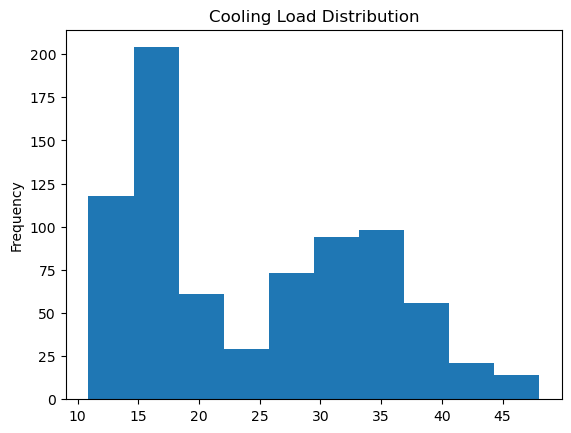

Data after one-hot encoding:
    # Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                    0.98         514.5      294.0     110.25             7.0   
1                    0.98         514.5      294.0     110.25             7.0   
2                    0.98         514.5      294.0     110.25             7.0   
3                    0.90         563.5      318.5     122.50             7.0   
4                    0.90         563.5      318.5     122.50             7.0   

   Glazing Area  Heating Load  Cooling Load  Orientation_2.0  Orientation_3.0  \
0           0.0         15.55         21.33             True            False   
1           0.0         15.55         21.33            False            False   
2           0.0         15.55         21.33            False            False   
3           0.0         20.84         28.28             True            False   
4           0.0         21.46         25.38            False             True 

In [13]:
# To understand this dataset - Optional
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('./Resources/2024_energy_efficiency_data.csv')

# 1. Initial inspection
print("Shape of dataset:", data.shape)
print("Data types and first few rows:\n", data.dtypes, data.head())

# 2. Check for missing data
missing_data = data.isnull().sum()
print("Missing data in each column:\n", missing_data)

# 3. Summary statistics for numerical features
print("Summary statistics for numerical features:\n", data.describe())

# 4. Unique values in categorical features
categorical_cols = ['Orientation', 'Glazing Area Distribution']
for col in categorical_cols:
    print(f"Unique values in {col}:", data[col].unique())
    print(f"Value counts in {col}:\n", data[col].value_counts())

# 5. Visualizing distributions
data.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

# Bar plot for categorical features
for col in categorical_cols:
    data[col].value_counts().plot(kind='bar', title=f'Distribution of {col}')
    plt.show()

# 6. Correlation matrix
corr_matrix = data.corr()
print("Correlation matrix:\n", corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()

# 7. Target distribution (Heating Load, Cooling Load)
print("Heating Load Distribution:\n", data['Heating Load'].describe())
data['Heating Load'].plot(kind='hist', title='Heating Load Distribution')
plt.show()

print("Cooling Load Distribution:\n", data['Cooling Load'].describe())
data['Cooling Load'].plot(kind='hist', title='Cooling Load Distribution')
plt.show()

# 8. One-hot encode categorical features
data_encoded = pd.get_dummies(data, columns=['Orientation', 'Glazing Area Distribution'], prefix=['Orientation', 'GlazingAreaDist'])
print("Data after one-hot encoding:\n", data_encoded.head())

# Check training test
print(X_train.columns)


In [58]:
# Step 2: Create functions to train model

# Initialize weights and biases
def initialize_weights(input_dim, hidden_dim, output_dim):
    # Randomly initialize weights and biases for each layer
    W1 = np.random.uniform(-1/np.sqrt(input_dim), 1/np.sqrt(input_dim), (input_dim, hidden_dim))
    b1 = np.zeros((1, hidden_dim))
    W2 = np.random.uniform(-1/np.sqrt(hidden_dim), 1/np.sqrt(hidden_dim), (hidden_dim, output_dim))
    b2 = np.zeros((1, output_dim))
    
    return W1, b1, W2, b2

# Sigmoid activation function
def sigmoid(x):
    x = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-x))

# Sigmoid derivative (used in backpropagation)
def sigmoid_derivative(x):
    return x * (1 - x)

# Tanh Function
def tanh(x):
    return np.tanh(x)

# Tanh derivative function
def dtanh(x):
    return 1.0 - np.tanh(x)**2

# ReLU activation function
def relu(x):
    return np.maximum(0, x)

# ReLU derivative (for backpropagation)
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def MSE(y_pred, y_actual):
    return np.mean((y_pred - y_actual) ** 2)

def RMSE(y_pred, y_actual):
    return np.sqrt(np.mean((y_actual - y_pred) ** 2))

# Forward propagation
def forward_propagation(X, W1, b1, W2, b2, activation_function = "tanh"):
    Z1 = np.dot(X, W1) + b1 
    if activation_function == "relu":
        A1 = relu(Z1)
    elif activation_function == "sigmoid":
        A1 = sigmoid(Z1)
    elif activation_function == "tanh":
        A1 = tanh(Z1)        
    Z2 = np.dot(A1, W2) + b2 
    A2 = Z2                  
    return Z1, A1, Z2, A2

# Backward propagation with L1 regularization
def backward_propagation(X, Y, Z1, A1, Z2, A2, W1, W2, activation_function="tanh", lambda_l1=0.01):
    m = X.shape[0]  # Number of samples
    dZ2 = A2 - Y  # Derivative of cost function (Mean Squared Error for regression)
    dW2 = (1/m) * np.dot(A1.T, dZ2) + lambda_l1 * np.sign(W2)  # Adding L1 regularization
    db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)
    
    dA1 = np.dot(dZ2, W2.T)
    
    if activation_function == "relu":
        dZ1 = dA1 * relu_derivative(Z1)
    elif activation_function == "sigmoid":
        dZ1 = dA1 * sigmoid_derivative(sigmoid(Z1))
    elif activation_function == "tanh":
        dZ1 = dA1 * dtanh(Z1)
    
    dW1 = (1/m) * np.dot(X.T, dZ1) + lambda_l1 * np.sign(W1)  # Adding L1 regularization to W1
    db1 = (1/m) * np.sum(dZ1, axis=0)
    
    return dW1, db1, dW2, db2

# Update weights and biases
def update_weights(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

# Save weights and biases
def save_parameters(W1, b1, W2, b2):
    file_path = "./Parameters"
    np.save(f"{file_path}/W1.npy",W1)
    np.save(f"{file_path}/W2.npy",W2)
    np.save(f"{file_path}/b1.npy",b1)
    np.save(f"{file_path}/b2.npy",b2)

# Step 3: Define train function the model
def train(
    X,
    Y,
    input_dim,
    hidden_dim,
    output_dim,
    epochs,
    learning_rate,
    train_losses,
    X_test,
    Y_test,
    test_losses,
):
    # Define activation function
    activation_function = "tanh" 

    # Initialize weights
    W1, b1, W2, b2 = initialize_weights(input_dim, hidden_dim, output_dim)

    for i in range(epochs):
        # Forward propagation
        Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2, activation_function)

        # Calculate loss (MSE for regression)
        loss = np.mean((A2 - Y) ** 2)

        # Saving training losses to plot learning curve
        train_losses.append(loss)

        # Backward propagation
        dW1, db1, dW2, db2 = backward_propagation(X, Y, Z1, A1, Z2, A2, W1, W2, activation_function)

        # Update weights
        W1, b1, W2, b2 = update_weights(
            W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate
        )

        # Test every single version
        _, _, _, Y_pred_heating = forward_propagation(X_test, W1, b1, W2, b2, activation_function)
        test_loss = np.mean((Y_pred_heating - Y_test) ** 2)
        test_losses.append(test_loss)

        if i % (int(epochs / 10)) == 0:
            print(f"Epoch {i+1}/{epochs}, Train Loss: {loss} - Test Loss {test_loss}")

    return W1, b1, W2, b2


def plot_learning_curves(train_losses, test_losses):
    plt.figure(figsize=(12, 6))
    
    # First subplot: Training loss
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    plt.plot(train_losses, label='Train Loss', color='blue')
    plt.title("Training Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    
    # Second subplot: Test loss
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    plt.plot(test_losses, label='Test Loss', color='orange')
    plt.title("Test Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()


def plot_predictions_vs_actual(Y_pred, Y_actual, title="Model Predictions vs Actual Values", ylabel="Heating Load"):
    plt.figure(figsize=(12, 6))
    
    # Plot predicted values
    plt.plot(Y_pred.flatten(), label="Predicted", linestyle='-', marker='o')
    
    # Plot actual values
    plt.plot(Y_actual, label="Actual", linestyle='-', marker='.')
    
    # Add title and labels
    plt.title(title)
    plt.xlabel("#Th case")
    plt.ylabel(ylabel)
    
    # Add grid and legend
    plt.legend()
    plt.grid(True)
    
    # Show the plot
    plt.show()


In [66]:
# Step 3: Training 
input_dim = X_train.shape[1]  # Number of features
print(X_train.shape[1])
hidden_dim = 8  # Example hidden layer size (you can adjust this)
output_dim = 1  # Predicting one continuous value (Heating Load)
epochs = 7500  # You can adjust the number of epochs
learning_rate = 0.05  # Learning rate for gradient descent
train_losses = []
test_losses = []

# Train the model
W1, b1, W2, b2 = train(X_train, Y_train['Heating Load'].values.reshape(-1, 1),
                       input_dim, hidden_dim, output_dim, epochs, learning_rate, train_losses, X_test, Y_test[["Heating Load"]], test_losses)

# Save all weights and biases
save_parameters(W1, b1, W2, b2)

16
Epoch 1/7500, Train Loss: 590.4332477612708 - Test Loss 520.2645732783111
Epoch 751/7500, Train Loss: 4.941049423201445 - Test Loss 4.905157666978172
Epoch 1501/7500, Train Loss: 2.496549329077936 - Test Loss 2.418684310472987
Epoch 2251/7500, Train Loss: 1.7385804569125323 - Test Loss 1.7607852601663172
Epoch 3001/7500, Train Loss: 1.492235475965718 - Test Loss 1.4995349231132835
Epoch 3751/7500, Train Loss: 1.355022491457615 - Test Loss 1.3401492837297087
Epoch 4501/7500, Train Loss: 1.2498892456117279 - Test Loss 1.2238969891813483
Epoch 5251/7500, Train Loss: 1.1845468246089206 - Test Loss 1.153646080063697
Epoch 6001/7500, Train Loss: 1.1293236338287014 - Test Loss 1.0983951285528872
Epoch 6751/7500, Train Loss: 1.09290679766085 - Test Loss 1.064531978781974


Heating Load - Mean Squared Error (MSE) on Train Set: 1.064215656850869
Heating Load - Root Mean Squared Error (RMSE) on Test Set: 1.0316082865365463
Heating Load - Mean Squared Error (MSE) on Test Set: 1.2806711043093506
Heating Load - Root Mean Squared Error (RMSE) on Test Set: 1.131667400038258


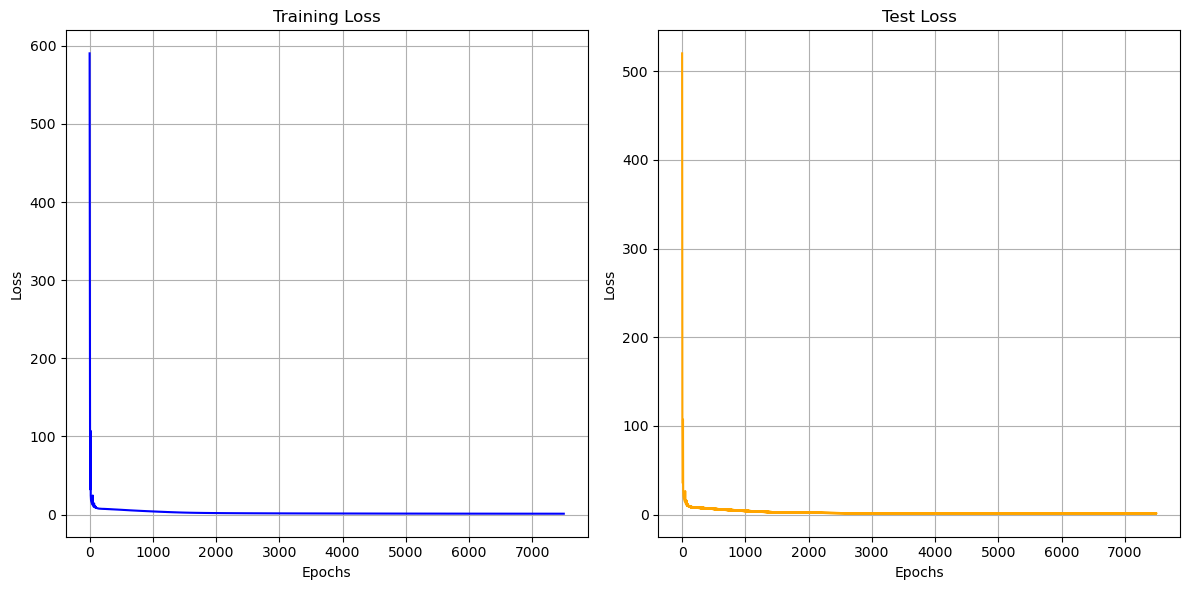

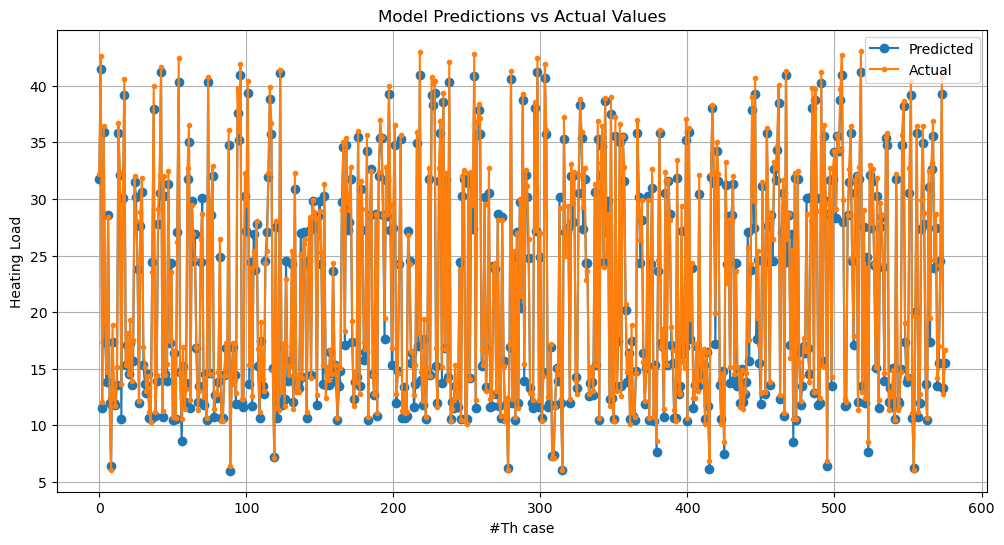

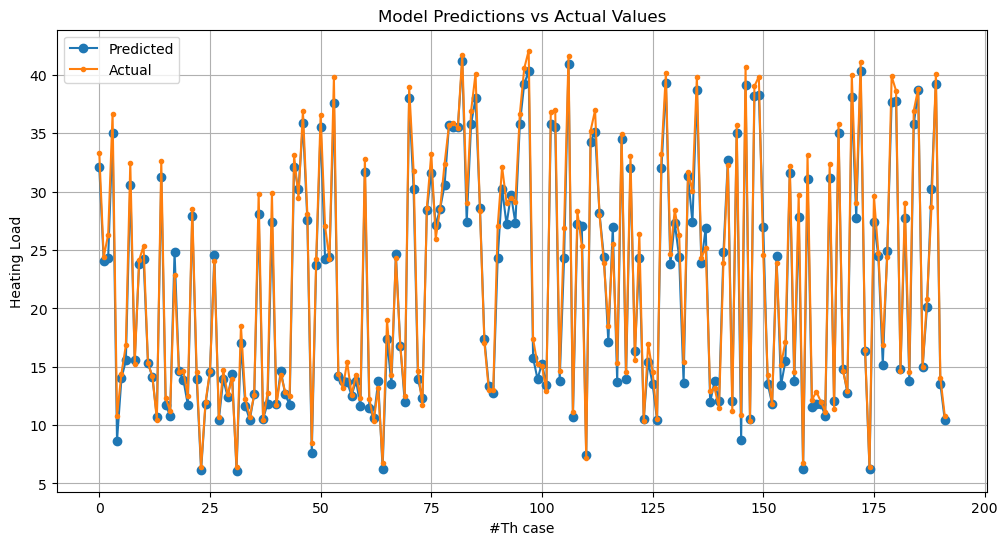

Training Results Comparison:
Predicted: 31.766032715692173 - Actual: 33.94
Predicted: 41.44409142398669 - Actual: 39.07
Predicted: 11.48848348661901 - Actual: 15.57
Predicted: 35.87410092443042 - Actual: 36.81
Predicted: 17.392350659907247 - Actual: 21.54
Predicted: 13.856916807600253 - Actual: 16.44
Predicted: 28.61149075192992 - Actual: 29.49
Predicted: 11.956564540640553 - Actual: 15.35
Predicted: 6.375833900979271 - Actual: 10.9
Predicted: 17.38892087533687 - Actual: 22.09
Test Results Comparison:
Predicted: 32.093234619521596 - Actual: 34.11
Predicted: 24.020650539111074 - Actual: 26.02
Predicted: 24.292850780881047 - Actual: 31.06
Predicted: 35.00515386276186 - Actual: 34.29
Predicted: 8.654419241865615 - Actual: 16.75
Predicted: 14.000102974634025 - Actual: 17.2
Predicted: 15.54486836524579 - Actual: 20.56
Predicted: 30.570981369321352 - Actual: 35.48
Predicted: 15.614709808183507 - Actual: 18.14
Predicted: 23.823582895613853 - Actual: 26.13


In [67]:
# Question 1-a: Predict Heating Load, Evaluate performance using RMSE for Training Data and Test Data  
_, _, _, Y_pred_heating_test = forward_propagation(X_test, W1, b1, W2, b2)
_, _, _, Y_pred_heating_train = forward_propagation(X_train, W1, b1, W2, b2)

Y_pred_test = Y_pred_heating_test.flatten()
Y_pred_train = Y_pred_heating_train.flatten()

# Question 1-b: Show all results
# Evaluate the performance for TRAIN using Mean Squared Error (RMSE)
mse_heating = MSE(Y_train['Heating Load'], Y_pred_train)
print(f'Heating Load - Mean Squared Error (MSE) on Train Set: {mse_heating}')
print(f'Heating Load - Root Mean Squared Error (RMSE) on Test Set: {np.sqrt(mse_heating)}')

# Evaluate the performance for TEST using Mean Squared Error (RMSE)
mse_heating = MSE(Y_test['Heating Load'], Y_pred_test)
print(f'Heating Load - Mean Squared Error (MSE) on Test Set: {mse_heating}')
print(f'Heating Load - Root Mean Squared Error (RMSE) on Test Set: {np.sqrt(mse_heating)}')

plot_learning_curves(train_losses, test_losses)
plot_predictions_vs_actual(Y_pred_train, Y_train["Heating Load"].values)
plot_predictions_vs_actual(Y_pred_test, Y_test["Heating Load"].values)

# Get ten pair of sample for those experiments
print("Training Results Comparison:")
for i in range(10):
    print("Predicted: "+ str(Y_pred_heating_train.flatten()[i]) + " - Actual: " + str(Y_train["Cooling Load"].values[i]))

print("Test Results Comparison:")
for i in range(10):
    print("Predicted: "+ str(Y_pred_heating_test.flatten()[i]) + " - Actual: " + str(Y_test["Cooling Load"].values[i]))

In [64]:
# Question 1 - c: Check important features, which features have non-zero weights
weight_sums = np.sum(np.abs(W1), axis=1)

important_features = X_train.columns[weight_sums > 0]

df_important_features = pd.DataFrame({
    "Feature": X_train.columns,
    "Weight Sum": weight_sums
}).sort_values(by="Weight Sum", ascending=False)
df_important_features.reset_index(drop=True, inplace=True)
print("Important Features Order: \n", df_important_features)

Important Features Order: 
                    Feature  Weight Sum
0                Wall Area   19.941050
1                Roof Area   13.714497
2   # Relative Compactness    8.739245
3             Glazing Area    5.841303
4           Overall Height    5.231094
5      GlazingAreaDist_0.0    1.737106
6             Surface Area    1.300620
7      GlazingAreaDist_5.0    0.237150
8      GlazingAreaDist_3.0    0.201560
9          Orientation_2.0    0.071692
10         Orientation_5.0    0.071308
11     GlazingAreaDist_1.0    0.068754
12         Orientation_3.0    0.066371
13         Orientation_4.0    0.050539
14     GlazingAreaDist_4.0    0.037924
15     GlazingAreaDist_2.0    0.024974
